In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_dataset = pd.read_csv('Datasets/VanilaDataset/test_patterns_with_symbols.csv')
train_dataset = pd.read_csv('Datasets/VanilaDataset/train_patterns_with_symbols.csv')

file_path = "Datasets/VanilaDataset"
train_dataset_processed = pd.read_csv(file_path + "/trainDataset_w_aug.csv", index_col=[0, 1])
test_dataset_processed = pd.read_csv(file_path + "/testDataset_w_aug.csv" , index_col=[0, 1])

# combine the datasets
dataset = pd.concat([train_dataset, test_dataset])
dataset

,Symbol,Chart Pattern,BullishBearish,Start,End,Industry,Pattern_Length
0,GIS,"Triangle, symmetrical",0,2024-12-18,2025-01-02,Food Processing,15
1,TXN,"Double Top, Adam and Adam",0,2025-01-15,2025-01-23,Semiconductor,8
2,BSET,"Flag, high and tight",1,2020-06-25,2020-08-20,Furn/Home Furnishings,56
3,NOVT,"Double Bottom, Adam and Adam",0,2024-02-21,2024-02-27,Precision Instrument,6
4,IPAR,"Double Bottom, Eve and Adam",0,2024-05-01,2024-05-08,Toiletries/Cosmetics,7
...,...,...,...,...,...,...,...
590,RGLD,"Double Top, Adam and Adam",0,2024-10-21,2024-10-29,Metals and Mining (Div.),8
591,MRK,"Double Bottom, Eve and Adam",0,2024-08-07,2024-08-14,Drug,7
592,IRM,"Double Bottom, Adam and Adam",0,2025-01-28,2025-02-03,Industrial Services,6
593,CBT,"Double Top, Adam and Adam",0,2024-11-25,2024-12-04,Chemical (Diversified),9


In [3]:
# sort by Start 
dataset = dataset.sort_values(by='Start')
dataset.reset_index(drop=True, inplace=True)
# coonvert Start and End to datetime
dataset['Start'] = pd.to_datetime(dataset['Start'])
dataset['End'] = pd.to_datetime(dataset['End'])
dataset

,Symbol,Chart Pattern,BullishBearish,Start,End,Industry,Pattern_Length
0,SKF,"Double Bottom, Adam and Adam",0,2012-09-14,2012-10-18,Short ETFs,34
1,GIS,"Triangle, symmetrical",1,2019-10-10,2020-01-09,Food Processing,91
2,OMC,Head-and-shoulders top,-1,2019-11-08,2020-01-21,Advertising,74
3,WIRE,"Triangle, symmetrical",1,2019-11-11,2020-01-09,Metals and Mining (Div.),59
4,AIG,"Triangle, symmetrical",1,2019-11-25,2020-01-07,Insurance (Prop/Casualty),43
...,...,...,...,...,...,...,...
2968,ITW,Head-and-shoulders top,0,2025-01-21,2025-01-31,Metal Fabricating,10
2969,HNI,"Double Top, Adam and Adam",0,2025-01-21,2025-01-27,Furn/Home Furnishings,6
2970,IPI,"Double Top, Adam and Adam",0,2025-01-22,2025-02-03,Chemical (Diversified),12
2971,CMI,"Double Bottom, Adam and Adam",0,2025-01-27,2025-02-03,Machinery,7


In [4]:
# get a list of all the unique symbols
symbols = dataset['Symbol'].unique()
symbols

array(['SKF', 'GIS', 'OMC', 'WIRE', 'AIG', 'EVH', 'CNA', 'PCG', 'SUM',
       'ORI', 'LH', 'BBW', 'CENX', 'CIEN', 'LUV', 'TZOO', 'ERA', 'ACN',
       'FLS', 'HQY', 'TPX', 'K', 'EIX', 'KALU', 'IBP', 'SLCA', 'CF',
       'SCCO', 'ABT', 'MRO', 'LAWS', 'SSYS', 'BLDR', 'STMP', 'ALRM',
       'AEIS', 'HBI', 'SXI', 'CBT', 'GNW', 'BERY', 'PG', 'CTSH', 'ABC',
       'EQT', 'TFX', 'NI', 'FRD', 'PTEN', 'CLNE', 'SRE', 'FTNT', 'APD',
       'FIVN', 'DDD', 'GPRO', 'TPR', 'EXC', 'RNG', 'PRU', 'AXP', 'APA',
       'BOOT', 'ASH', 'ASGN', 'CROX', 'LEG', 'GE', 'CAL', 'WSM', 'HOV',
       'AWI', 'LEN', 'TEVA', 'OXY', 'VLO', 'HSY', 'EOG', 'MUR', 'AGO',
       'COP', 'MDC', 'HSIC', 'PNW', 'DHI', 'TOL', 'DVN', 'ADTN', 'HOLX',
       'BSET', 'CLS', 'PETS', 'NUS', 'MDT', 'DECK', 'NSP', 'COTY', 'POL',
       'AYI', 'NVDA', 'EMR', 'MTRN', 'APOG', 'AMWD', 'BA', 'FCX', 'TREX',
       'AEL', 'DFS', 'KBH', 'PATK', 'HL', 'MHO', 'LOW', 'OLN', 'WMB',
       'AXDX', 'OMCL', 'OUT', 'SMG', 'LAMR', 'MTSI', 'BECN', 'VFC', '

# Creating a Dataset with Lable less segments


In [5]:
from tqdm import tqdm

num_of_unlabled_seg =10000
# Set a common random seed
SEED = 69
np.random.seed(SEED)

no_pattern_rows = []

with tqdm(total=num_of_unlabled_seg, desc="Processing Segments") as pbar:
    while num_of_unlabled_seg > 0:
        # get a random symbol from the list of symbols
        random_symbol = np.random.choice(symbols)
        # get the dataset for the random symbol
        symbol_dataset = dataset[dataset['Symbol'] == random_symbol]
        if(len(symbol_dataset)>1):
            # get a random index from the symbol dataset
            random_index = np.random.randint(0, len(symbol_dataset)-1)
            # get the random segment
            random_start_segment = symbol_dataset.iloc[random_index]
            random_end_segment = symbol_dataset.iloc[random_index + 1]
            
            # get the date range between the End date of the start segment and the Start date of the end segment
            num_of_dates = random_end_segment['Start'] - random_start_segment['End']
            num_of_dates = num_of_dates.days
            
            if num_of_dates > 10:
                min_start_date = random_start_segment['End']
                max_end_date = random_end_segment['Start']
                
                # print("min_start_date: ", min_start_date , "max_end_date: ", max_end_date,"date len",(max_end_date - min_start_date).days)
                
                # get a random start and end date between the min and max date
                random_start_date_i = np.random.randint(0, num_of_dates-10)
                random_start_date = min_start_date + pd.DateOffset(days=random_start_date_i)
                
                if((num_of_dates+1) -(random_start_date_i) > 100 ):
                    random_end_right_margin = random_start_date_i +100
                else:
                    random_end_right_margin = num_of_dates+1
                
                random_end_date_i = np.random.randint(random_start_date_i +10, random_end_right_margin)
                random_end_date = min_start_date + pd.DateOffset(days=random_end_date_i)
                
                # print("random_start_date: ", random_start_date , "random_end_date: ", random_end_date,"date len",(random_end_date - random_start_date).days)

                row = {
                    'Symbol': random_symbol,
                    'Chart Pattern': 'No Pattern',
                    'BullishBearish' : random_start_segment['BullishBearish'],
                    'Start': random_start_date,
                    'End': random_end_date, 
                    'Industry' : random_start_segment['Industry'],   
                    'Pattern_Length' : (random_end_date - random_start_date).days
                }
                
                no_pattern_rows.append(row)
                num_of_unlabled_seg -= 1
                pbar.update(1)

no_pattern_df = pd.DataFrame(no_pattern_rows)

Processing Segments: 100%|██████████| 10000/10000 [00:07<00:00, 1257.46it/s]


In [ ]:
# update the no_pattern_df Pattern_Length colum with correct values
# loop through each row in the no_pattern_df
for index, row in no_pattern_df.iterrows():
    symbol = row['Symbol']
    start_date = row['Start']
    end_date = row['End']
    # set to date time 
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    # read the OHLC data for the symbol from file
    ohlc_data = pd.read_csv(f'Datasets/OHLC data/{symbol}.csv')
    # set the Date column to datetime
    ohlc_data['Date'] = pd.to_datetime(ohlc_data['Date'])
    ohlc_data['Date'] = ohlc_data['Date'].dt.tz_localize(None)

    # get the ohlc data between the start and end date
    ohlc_data = ohlc_data[(ohlc_data['Date'] >= start_date) & (ohlc_data['Date'] <= end_date)]
    # get the length of the ohlc data
    pattern_length = len(ohlc_data)
    # update the Pattern_Length column with the correct value
    no_pattern_df.at[index, 'Pattern_Length'] = pattern_length

no_pattern_df

In [6]:
no_pattern_df

,Symbol,Chart Pattern,BullishBearish,Start,End,Industry,Pattern_Length
0,DDD,No Pattern,1,2023-09-30,2023-10-21,Electronics,21
1,XLK,No Pattern,0,2022-11-26,2022-12-15,IT Services,19
2,SIGI,No Pattern,-1,2023-07-25,2023-10-31,Insurance (Prop/Casualty),98
3,FMC,No Pattern,0,2023-01-13,2023-01-26,Chemical (Basic),13
4,KFRC,No Pattern,1,2022-05-24,2022-07-12,Human Resources,49
...,...,...,...,...,...,...,...
9995,NEE,No Pattern,0,2023-01-20,2023-02-01,Electric Utility (East),12
9996,BSET,No Pattern,1,2020-04-12,2020-05-17,Furn/Home Furnishings,35
9997,LEG,No Pattern,1,2022-06-02,2022-06-16,Furn/Home Furnishings,14
9998,RTX,No Pattern,0,2022-04-21,2022-06-03,Aerospace/Defense,43


In [133]:
# save no_pattern_df to csv 
no_pattern_df.to_csv("Datasets/VanilaDataset/no_pattern_10000_df.csv")    

In [7]:
from utils.formatAndPreprocess import dataset_format

#  create formatted data set for the train and test data
no_pattern_dataset,instance_index_mapping = dataset_format(no_pattern_df,give_instance_index_mapping=True)
no_pattern_dataset , instance_index_mapping

Processing 10000 tasks in parallel...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 7264 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:    9.1s finished


Total tasks: 10000, Successful: 9852
Instance counter final value: 9852
Number of successful instances: 9852
Debug - Instance Index Mapping:
Key: 0, Value: 0
Key: 1, Value: 354
Key: 2, Value: 1501
Key: 3, Value: 6775
Key: 4, Value: 6868
Key: 5, Value: 2056
Key: 6, Value: 2230
Key: 7, Value: 1822
Key: 8, Value: 1301
Key: 9, Value: 2531
Key: 10, Value: 6928
Key: 11, Value: 7213
Key: 12, Value: 8020
Key: 13, Value: 3951
Key: 14, Value: 3954
Key: 15, Value: 8134
Key: 16, Value: 9033
Key: 17, Value: 3249
Key: 18, Value: 4298
Key: 19, Value: 9122
Key: 20, Value: 1269
Key: 21, Value: 4514
Key: 22, Value: 1
Key: 23, Value: 1876
Key: 24, Value: 1986
Key: 25, Value: 3391
Key: 26, Value: 3441
Key: 27, Value: 3161
Key: 28, Value: 5144
Key: 29, Value: 6002
Key: 30, Value: 5346
Key: 31, Value: 5282
Key: 32, Value: 5213
Key: 33, Value: 5657
Key: 34, Value: 5459
Key: 35, Value: 6258
Key: 36, Value: 6486
Key: 37, Value: 7230
Key: 38, Value: 6600
Key: 39, Value: 6433
Key: 40, Value: 6669
Key: 41, Value:

e:\FYP\Candlestick-Chart-Pattern-Detection-FYP\utils\formatAndPreprocess.py:200: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)


Converted Mapping: {0: 0, 1: 354, 2: 1501, 3: 6775, 4: 6868, 5: 2056, 6: 2230, 7: 1822, 8: 1301, 9: 2531, 10: 6928, 11: 7213, 12: 8020, 13: 3951, 14: 3954, 15: 8134, 16: 9033, 17: 3249, 18: 4298, 19: 9122, 20: 1269, 21: 4514, 22: 1, 23: 1876, 24: 1986, 25: 3391, 26: 3441, 27: 3161, 28: 5144, 29: 6002, 30: 5346, 31: 5282, 32: 5213, 33: 5657, 34: 5459, 35: 6258, 36: 6486, 37: 7230, 38: 6600, 39: 6433, 40: 6669, 41: 7271, 42: 6262, 43: 7890, 44: 8239, 45: 2, 46: 9503, 47: 9724, 48: 2265, 49: 1180, 50: 1941, 51: 1727, 52: 3472, 53: 1050, 54: 9695, 55: 4174, 56: 1346, 57: 3832, 58: 5327, 59: 4869, 60: 8532, 61: 6609, 62: 7537, 63: 9322, 64: 8945, 65: 4953, 66: 5872, 67: 1666, 68: 4901, 69: 17, 70: 2721, 71: 3, 72: 1462, 73: 3111, 74: 3017, 75: 3493, 76: 5343, 77: 4996, 78: 6585, 79: 5142, 80: 6206, 81: 4944, 82: 7078, 83: 7835, 84: 8289, 85: 9913, 86: 8969, 87: 8575, 88: 3520, 89: 7498, 90: 7908, 91: 8097, 92: 905, 93: 4, 94: 492, 95: 1831, 96: 2623, 97: 1708, 98: 3503, 99: 9946, 100: 4682,

(                   Open      High       Low     Close    Volume  Pattern
 Instance Time                                                           
 0        0     0.964912  1.000000  0.666667  0.736842  0.857226        8
          1     0.692983  0.771930  0.517544  0.526316  0.601225        8
          2     0.517544  0.561403  0.298246  0.368421  0.495286        8
          3     0.385965  0.412281  0.236842  0.307017  0.221401        8
          4     0.236842  0.412281  0.192983  0.368421  0.115803        8
 ...                 ...       ...       ...       ...       ...      ...
 9851     6     0.616222  0.824455  0.559322  0.693704  0.422893        8
          7     0.777239  1.000000  0.722760  0.933414  0.798280        8
          8     0.857143  0.975786  0.650121  0.688862  0.242317        8
          9     0.573849  0.754237  0.457627  0.588378  0.151818        8
          10    0.715496  0.838983  0.598063  0.731235  0.000000        8
 
 [264711 rows x 6 columns],
 {0: 0,


In [8]:
train_dataset_processed

Open      High       Low     Close    Volume  Pattern
Instance Time                                                           
0        0     0.755760  1.000000  0.631336  0.645161  1.000000        0
         1     0.576037  0.576037  0.198157  0.211981  0.276309        0
         2     0.299539  0.341014  0.087558  0.184332  0.000000        0
         3     0.165899  0.239632  0.000000  0.184332  0.159668        0
         4     0.202765  0.350231  0.105991  0.267281  0.216174        0
...                 ...       ...       ...       ...       ...      ...
7145     1     0.393576  0.755020  0.383535  0.674699  0.115707        4
         2     0.706829  0.921687  0.558233  0.805220  0.873672        4
         3     0.548192  0.618475  0.341365  0.495985  1.000000        4
         4     0.889561  1.000000  0.152609  0.439760  0.206260        4
         5     0.259038  0.546185  0.054218  0.516066  0.000000        4

[227763 rows x 6 columns]

In [9]:
train_dataset_processed_copy = train_dataset_processed.copy()
# make a new column with the same values as the Instance index(Level 0) values
train_dataset_processed_copy['Instance'] = train_dataset_processed_copy.index.get_level_values(0)
train_dataset_processed_copy

Open      High       Low     Close    Volume  Pattern  \
Instance Time                                                              
0        0     0.755760  1.000000  0.631336  0.645161  1.000000        0   
         1     0.576037  0.576037  0.198157  0.211981  0.276309        0   
         2     0.299539  0.341014  0.087558  0.184332  0.000000        0   
         3     0.165899  0.239632  0.000000  0.184332  0.159668        0   
         4     0.202765  0.350231  0.105991  0.267281  0.216174        0   
...                 ...       ...       ...       ...       ...      ...   
7145     1     0.393576  0.755020  0.383535  0.674699  0.115707        4   
         2     0.706829  0.921687  0.558233  0.805220  0.873672        4   
         3     0.548192  0.618475  0.341365  0.495985  1.000000        4   
         4     0.889561  1.000000  0.152609  0.439760  0.206260        4   
         5     0.259038  0.546185  0.054218  0.516066  0.000000        4   

               Instance  
Instance Time            
0        0            0  
         1            0  
         2            0  
         3            0  
         4            0  
...                 ...  
7145     1         7145  
         2         7145  
         3         7145  
         4         7145  
         5         7145  

[227763 rows x 7 columns]

In [10]:
Instance_Lits = [2,1,0,6406]
# get the data set where the Instance is in the list
train_dataset_processed_copy[train_dataset_processed_copy['Instance'].isin(Instance_Lits)]

Open      High       Low     Close    Volume  Pattern  \
Instance Time                                                              
0        0     0.755760  1.000000  0.631336  0.645161  1.000000        0   
         1     0.576037  0.576037  0.198157  0.211981  0.276309        0   
         2     0.299539  0.341014  0.087558  0.184332  0.000000        0   
         3     0.165899  0.239632  0.000000  0.184332  0.159668        0   
         4     0.202765  0.350231  0.105991  0.267281  0.216174        0   
...                 ...       ...       ...       ...       ...      ...   
6406     17    0.393333  0.571111  0.342222  0.342222  0.384150        2   
         18    0.333333  0.333333  0.148889  0.244445  0.511099        2   
         19    0.184444  0.195555  0.000000  0.175555  0.621354        2   
         20    0.175555  0.337778  0.108889  0.224444  0.292057        2   
         21    0.348889  0.473333  0.297778  0.355556  0.929004        2   

               Instance  
Instance Time            
0        0            0  
         1            0  
         2            0  
         3            0  
         4            0  
...                 ...  
6406     17        6406  
         18        6406  
         19        6406  
         20        6406  
         21        6406  

[65 rows x 7 columns]

# PU Bagging Model


In [11]:
import time
from sklearn.pipeline import make_pipeline
from sktime.transformations.panel.rocket import MiniRocketMultivariate
from xgboost import XGBClassifier
from utils.FixedLengthTransformer import FixedLengthTransformer

def train_mini_rcket(X_train,y_train) :
    fl = FixedLengthTransformer(fixed_length=100, fill_value=0)
    mini_rocket = MiniRocketMultivariate(num_kernels=10000 , n_jobs=-1)
    xgbmr = XGBClassifier(
        eval_metric='mlogloss', 
        n_estimators=100,
        device="cuda"
    )

    clf_mini_rocket_xgb = make_pipeline(
        fl,
        mini_rocket,
        xgbmr
    )
    clf_mini_rocket_xgb.fit(X_train, y_train)

    return clf_mini_rocket_xgb

In [12]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# - Create a training set by combining au positive data points With a random 
#   sample from the unlabeled points. With replacement.
# - Build a classifier from this "bootstrap" sample. treating positive and unlabeled 
#   data points as positives and negatives. respectively,
# - Apply the classifier to whatever the unlabeled data points were not included in the 
#   random sample - hereafter called OOB (Out of Bag) points — and record their scores.
# - Repeat the three Steps above many times and finally assign to each point the average 
#   Of OOB scores it has received.

# get the unique value list of level 0 index Instance
unique_unlabeled_instance = no_pattern_dataset.index.get_level_values(0).unique()
# for each data point , keep track of how many times it has ben OOB and the sum of the probabilities assigned to it
oob_no_pattern_df = pd.DataFrame(index=unique_unlabeled_instance, columns=['oob_count', 'oob_sum'])
oob_no_pattern_df['oob_count'] = 0
oob_no_pattern_df['oob_sum'] = 0

n_estimators = 250


# Create a tqdm object and assign it to a variable
progress_bar = tqdm(range(n_estimators), desc="Training Progress", unit="iteration")

for i in progress_bar:
    # get a 20% sample of Instance index from the instance_list_unlabled with replacement 
    sample_train_instances = np.random.choice(unique_unlabeled_instance, size=int(0.2 * len(unique_unlabeled_instance)), replace=True)
    sample_test_instances = unique_unlabeled_instance [~np.isin(unique_unlabeled_instance, sample_train_instances)]
    # get the data set where the Instance is in the list
    sample_train = no_pattern_dataset[no_pattern_dataset.index.get_level_values(0).isin(sample_train_instances)]
    sample_test = no_pattern_dataset[no_pattern_dataset.index.get_level_values(0).isin(sample_test_instances)]

    sample_test = sample_test.copy()  # Make an explicit copy
    sample_test['Instance'] = sample_test.index.get_level_values(0)


    # Extract Instance and Time indices from sample_test
    instance_idx = sample_test.index.get_level_values(0)
    time_idx = sample_test.index.get_level_values(1)

    # Create new Instance index starting from max_instance + 1
    new_instance_idx = pd.factorize(instance_idx)[0]  

    # Reconstruct the MultiIndex with updated Instance indices
    sample_test.index = pd.MultiIndex.from_arrays([new_instance_idx, time_idx], names=["Instance", "Time"])


    # create a mapping dictionary from the old Instance index to the new Instance index
    test_inst_mapping_dict = dict(zip(new_instance_idx,instance_idx))
    # print(test_inst_mapping_dict)


    # print("Sampek test :",sample_test)
    # print(sample_train)

    # get the  largest Instance index in the train_dataset_processed
    max_instance = train_dataset_processed.index.get_level_values(0).max()

    # Extract Instance and Time indices from sample_train
    instance_idx = sample_train.index.get_level_values(0)
    time_idx = sample_train.index.get_level_values(1)

    # Create new Instance index starting from max_instance + 1
    new_instance_idx = pd.factorize(instance_idx)[0] + max_instance + 1  # Ensure unique new indices

    # Reconstruct the MultiIndex with updated Instance indices
    sample_train.index = pd.MultiIndex.from_arrays([new_instance_idx, time_idx], names=["Instance", "Time"])



    # print(sample_train.index.get_level_values(0).unique())
    # print(len(sample_train.index.get_level_values(0).unique()))
    # print(sample_train)

    # concatanate the sample with the train_dataset_processed data
    train_data = pd.concat([train_dataset_processed, sample_train])
    X_train = train_data.drop(columns=['Pattern'])
    y_train = train_data.groupby(level=0)['Pattern'].first().to_frame()
    X_test = test_dataset_processed.drop(columns=['Pattern'])
    y_test = test_dataset_processed.groupby(level=0)['Pattern'].first().to_frame()

    mini_rocket_model = train_mini_rcket(X_train,y_train)

    # # get the probabilities of the test data
    # y_test_prob = mini_rocket_model.predict_proba(X_test)
    # y_test_pred = y_test_prob.argmax(axis=1)  
    # test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # # print("Test accuracy for the ",i,"th model: ", test_accuracy)
    
    # # Update the postfix with the previous accuracy
    # progress_bar.set_postfix({"Prev Accuracy": f"{test_accuracy:.4f}" if test_accuracy is not None else "N/A"})

    # get the probabilities of the sample test data
    y_sample_test_prob = mini_rocket_model.predict_proba(sample_test)

    for j in range(0, len(y_sample_test_prob)):
        correct_instance = test_inst_mapping_dict[j]
        # print(y_sample_test_prob[j][7])
        oob_no_pattern_df.loc[correct_instance, 'oob_count'] += 1
        oob_no_pattern_df.loc[correct_instance, 'oob_sum'] += y_sample_test_prob[j][7]
oob_no_pattern_df

Training Progress:   0%|          | 0/250 [00:00<?, ?iteration/s]c:\Users\gwiku\miniconda3\envs\FYPenv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:59:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
C:\Users\gwiku\AppData\Local\Temp\ipykernel_46624\2040335765.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0007869450491853058' has dtype incompatible with int64, ple

,oob_count,oob_sum
Instance,,
0,210,0.039669
1,205,0.012538
2,194,0.040553
3,204,0.015271
4,203,0.018782
...,...,...
9847,203,0.016745
9848,193,0.002348
9849,210,0.028813


In [13]:
# remove the row print constrain in pandas 
pd.reset_option('display.max_rows')
oob_no_pattern_df


,oob_count,oob_sum
Instance,,
0,210,0.039669
1,205,0.012538
2,194,0.040553
3,204,0.015271
4,203,0.018782
...,...,...
9847,203,0.016745
9848,193,0.002348
9849,210,0.028813


In [14]:
# save oob_no_pattern_df to a csv file
oob_no_pattern_df.to_csv('Datasets/VanilaDataset/oob_no_pattern_stats_df.csv')
# save the dictionary to a csv 
instance_index_mapping_df = pd.DataFrame(instance_index_mapping.items(), columns=['Instance', 'Index'])
instance_index_mapping_df.to_csv('Datasets/VanilaDataset/instance_index_mapping_df.csv')

In [28]:
# save the dictionary to a csv 
instance_index_mapping_df = pd.DataFrame(instance_index_mapping.items(), columns=['Instance', 'Index'])
instance_index_mapping_df.to_csv('Datasets/VanilaDataset/instance_index_mapping_df.csv')

In [15]:
# load csv dataset
oob_no_pattern_df = pd.read_csv('Datasets/VanilaDataset/oob_no_pattern_stats_df.csv', index_col=0)
oob_no_pattern_df["Avg_Prob"] = oob_no_pattern_df['oob_sum'] / oob_no_pattern_df['oob_count']
oob_no_pattern_df

,oob_count,oob_sum,Avg_Prob
Instance,,,
0,210,0.039669,0.000189
1,205,0.012538,0.000061
2,194,0.040553,0.000209
3,204,0.015271,0.000075
4,203,0.018782,0.000093
...,...,...,...
9847,203,0.016745,0.000082
9848,193,0.002348,0.000012
9849,210,0.028813,0.000137


In [16]:
# sort by the average probability column
oob_no_pattern_df = oob_no_pattern_df.sort_values(by='Avg_Prob', ascending=False)
oob_no_pattern_df

,oob_count,oob_sum,Avg_Prob
Instance,,,
4621,217,215.545864,9.932989e-01
941,208,205.345454,9.872378e-01
9576,204,201.064699,9.856113e-01
9542,202,198.725269,9.837885e-01
7322,198,192.637165,9.729150e-01
...,...,...,...
1643,201,0.000125,6.242614e-07
4930,209,0.000126,6.037215e-07
7787,201,0.000120,5.985716e-07


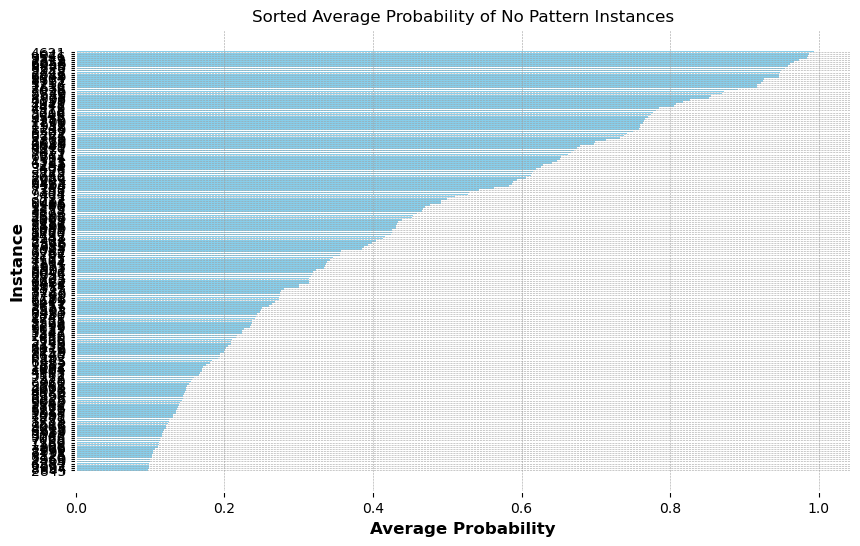

In [86]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Avg_Prob' in descending order
sorted_df = oob_no_pattern_df.sort_values(by='Avg_Prob', ascending=False)

# sorted_df equals the data where the 'Avg_Prob' is higher than 0.5
top_instances = sorted_df.head(200)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_instances.index.astype(str), top_instances['Avg_Prob'], color='skyblue')
plt.xlabel('Average Probability')
plt.ylabel('Instance')
plt.title('Sorted Average Probability of No Pattern Instances')

plt.gca().invert_yaxis()  # Invert y-axis to have highest at the top
plt.show()


In [96]:
sorted_df[sorted_df['Avg_Prob'] > 0.08]

,oob_count,oob_sum,Avg_Prob
Instance,,,
4621,217,215.545864,0.993299
941,208,205.345454,0.987238
9576,204,201.064699,0.985611
9542,202,198.725269,0.983788
7322,198,192.637165,0.972915
...,...,...,...
287,206,18.041874,0.087582
1809,209,17.887651,0.085587
4119,214,17.906426,0.083675


In [37]:
# get the top 200 instances with the highest average probability
top_200_instances = sorted_df.head(200)
top_200_instances

,oob_count,oob_sum,Avg_Prob
Instance,,,
4621,217,215.545864,0.993299
941,208,205.345454,0.987238
9576,204,201.064699,0.985611
9542,202,198.725269,0.983788
7322,198,192.637165,0.972915
...,...,...,...
4284,198,19.823418,0.100118
6252,203,20.059758,0.098817
2067,214,21.068188,0.098449


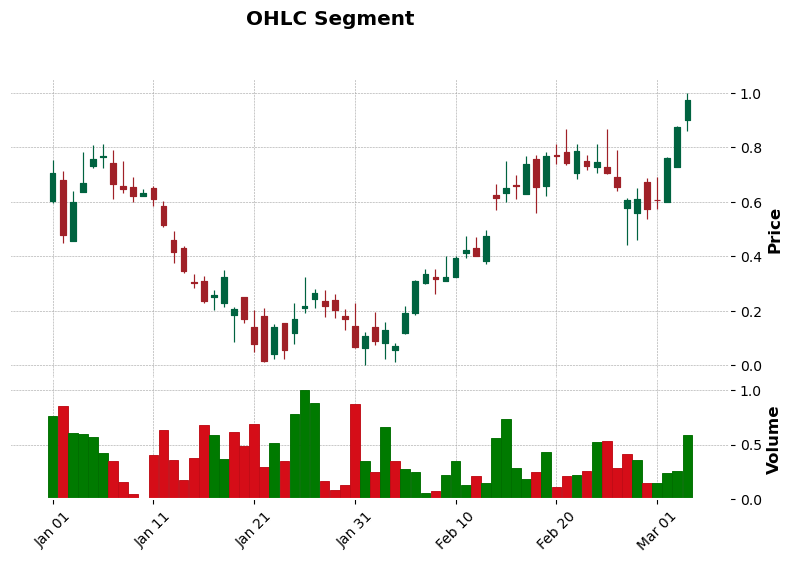

In [39]:
import pandas as pd
import mplfinance as mpf

def plot_ohlc_segment(data_segment):
    """
    Plots a segment of OHLC data using mplfinance.

    Parameters:
    - data_segment (pd.DataFrame): A DataFrame containing columns ['Open', 'High', 'Low', 'Close', 'Volume']
    """
    # Ensure the DataFrame index is datetime for mplfinance
    data_segment = data_segment.copy()
    data_segment.index = pd.date_range(start='2024-01-01', periods=len(data_segment), freq='D')

    # Plot the candlestick chart
    mpf.plot(data_segment, type='candle', style='charles',
             volume=True, ylabel='Price', ylabel_lower='Volume',
             title="OHLC Segment", figsize=(10, 6))


# Call the function to plot
plot_ohlc_segment(no_pattern_dataset.loc[4621])


# Creating Train and Test full sets by combining data from no pattern segments

## Run from here incase of test train data change occurs

In [ ]:
test_dataset = pd.read_csv('Datasets/VanilaDataset/test_patterns_with_symbols.csv')
train_dataset = pd.read_csv('Datasets/VanilaDataset/train_patterns_with_symbols.csv')

file_path = "Datasets/VanilaDataset"
train_dataset_processed = pd.read_csv(file_path + "/trainDataset_w_aug.csv", index_col=[0, 1])
test_dataset_processed = pd.read_csv(file_path + "/testDataset_w_aug.csv" , index_col=[0, 1])

In [ ]:
# load csv dataset
oob_no_pattern_df = pd.read_csv('Datasets/VanilaDataset/oob_no_pattern_stats_df.csv', index_col=0)
oob_no_pattern_df["Avg_Prob"] = oob_no_pattern_df['oob_sum'] / oob_no_pattern_df['oob_count']
sorted_df = oob_no_pattern_df.sort_values(by='Avg_Prob', ascending=False)
top_200_instances = sorted_df.head(200)

no_pattern_df = pd.read_csv('Datasets/VanilaDataset/no_pattern_10000_df.csv', index_col=0)
# Read the CSV file
instance_index_mapping_df = pd.read_csv('Datasets/VanilaDataset/instance_index_mapping_df.csv', index_col=0)
# Convert back to dictionary
instance_index_mapping = dict(zip(instance_index_mapping_df['Instance'], instance_index_mapping_df['Index']))

In [83]:
top_200_instances = top_200_instances.index
top_200_instances

Index([4621,  941, 9576, 9542, 7322, 6058, 6059, 8845, 3225, 3748,
       ...
       8992, 7225, 8125, 3230, 2969, 4284, 6252, 2067, 8884, 2845],
      dtype='int64', name='Instance', length=200)

In [84]:
# get random 80% of the top 200 instances for training and 20% for testing
train_instances = np.random.choice(top_200_instances, size=int(0.8 * len(top_200_instances)), replace=False)
test_instances = top_200_instances[~np.isin(top_200_instances, train_instances)]
len(train_instances), len(test_instances)

(160, 40)

In [100]:
# get the test and train OHLC data for no pattern instances
train_no_pattern_ohlc = no_pattern_dataset.loc[train_instances]
test_no_pattern_ohlc = no_pattern_dataset.loc[test_instances]

In [108]:
mapped_indices_train = [instance_index_mapping[key] for key in train_instances]  # Convert instances to original indices
train_no_pattern_details = no_pattern_df.loc[mapped_indices_train]
train_no_pattern_details.reset_index(drop=True, inplace=True)

mapped_indices_test = [instance_index_mapping[key] for key in test_instances]  # Convert instances to original indices
test_no_pattern_details = no_pattern_df.loc[mapped_indices_test]
test_no_pattern_details.reset_index(drop=True, inplace=True)

In [109]:
train_no_pattern_details

,Symbol,Chart Pattern,BullishBearish,Start,End,Industry,Pattern_Length
0,SPSC,No Pattern,0,2024-04-26,2024-07-25,E-Commerce,62
1,BALL,No Pattern,0,2023-08-28,2023-12-02,Packaging and Container,68
2,LAMR,No Pattern,-1,2021-05-09,2021-08-11,Advertising,66
3,WEX,No Pattern,1,2021-10-31,2022-02-01,Information Services,64
4,GPRO,No Pattern,1,2022-11-12,2023-02-02,Electronics,55
...,...,...,...,...,...,...,...
155,WOLF,No Pattern,0,2023-04-09,2023-07-16,Semiconductor,67
156,DSGR,No Pattern,1,2022-09-14,2022-11-11,Metal Fabricating,43
157,BKNG,No Pattern,1,2022-05-31,2022-08-16,Internet,54
158,ON,No Pattern,0,2023-10-18,2024-01-17,Semiconductor,62


In [110]:
train_no_pattern_ohlc

Open      High       Low     Close    Volume  Pattern
Instance Time                                                           
9736     0     0.167885  0.254830  0.027937  0.140731  0.689172        8
         1     0.147519  0.243342  0.120887  0.232376  0.360090        8
         2     0.177284  0.233159  0.000000  0.007833  0.717679        8
         3     0.055613  0.247781  0.018538  0.140992  0.349087        8
         4     0.169713  0.225326  0.092689  0.221932  0.323331        8
...                 ...       ...       ...       ...       ...      ...
1687     60    0.675079  0.760252  0.652997  0.744479  0.203040        8
         61    0.741325  0.817035  0.712934  0.794953  0.234626        8
         62    0.776025  0.817035  0.750789  0.817035  0.096385        8
         63    0.782334  0.804416  0.731861  0.772871  0.132083        8
         64    0.763407  0.776025  0.712934  0.769716  0.106083        8

[9717 rows x 6 columns]

### combine in to existing datasets

In [118]:
# concatanate the train_no_pattern_details with the train_dataset
full_train_no_pattern_details = pd.concat([train_dataset, train_no_pattern_details])
full_train_no_pattern_details.reset_index(drop=True, inplace=True)

# concatanate the test_no_pattern_details with the test_dataset
full_test_no_pattern_details = pd.concat([test_dataset, test_no_pattern_details])
full_test_no_pattern_details.reset_index(drop=True, inplace=True)   

In [126]:

def instance_index_reset(ohlc_multi_idx_df , max_instance= 0):
    # Extract Instance and Time indices from sample_train
    instance_idx = ohlc_multi_idx_df.index.get_level_values(0)
    time_idx = ohlc_multi_idx_df.index.get_level_values(1)

    # Create new Instance index starting from max_instance + 1
    new_instance_idx = pd.factorize(instance_idx)[0] + max_instance + 1  # Ensure unique new indices

    # Reconstruct the MultiIndex with updated Instance indices
    ohlc_multi_idx_df.index = pd.MultiIndex.from_arrays([new_instance_idx, time_idx], names=["Instance", "Time"])
    
    return ohlc_multi_idx_df

In [127]:
train_no_pattern_ohlc = instance_index_reset(train_no_pattern_ohlc, max_instance=train_dataset_processed.index.get_level_values(0).max())
test_no_pattern_ohlc = instance_index_reset(test_no_pattern_ohlc, max_instance=test_dataset_processed.index.get_level_values(0).max())

In [131]:
# concatanate the train_no_pattern_ohlc with the train_dataset_processed
full_train_no_pattern_ohlc = pd.concat([train_dataset_processed, train_no_pattern_ohlc])

# concatanate the test_no_pattern_ohlc with the test_dataset_processed
full_test_no_pattern_ohlc = pd.concat([test_dataset_processed, test_no_pattern_ohlc])

In [140]:
# Convert 'Start' and 'End' columns to datetime format
full_train_no_pattern_details['Start'] = pd.to_datetime(full_train_no_pattern_details['Start'], errors='coerce')
full_train_no_pattern_details['End'] = pd.to_datetime(full_train_no_pattern_details['End'], errors='coerce')

# Remove any time component (optional if you only want dates)
full_train_no_pattern_details['Start'] = full_train_no_pattern_details['Start'].dt.date
full_train_no_pattern_details['End'] = full_train_no_pattern_details['End'].dt.date

In [141]:
# Convert 'Start' and 'End' columns to datetime format
full_test_no_pattern_details['Start'] = pd.to_datetime(full_test_no_pattern_details['Start'], errors='coerce')
full_test_no_pattern_details['End'] = pd.to_datetime(full_test_no_pattern_details['End'], errors='coerce')

# Remove any time component (optional if you only want dates)
full_test_no_pattern_details['Start'] = full_test_no_pattern_details['Start'].dt.date
full_test_no_pattern_details['End'] = full_test_no_pattern_details['End'].dt.date

In [142]:
folder_path = "Datasets/VanilaDataset/PU results/"

# create the folder if it does not exist
import os
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# save to a csv file
full_train_no_pattern_details.to_csv(folder_path+'train_PU_no_pattern_details.csv')
full_train_no_pattern_ohlc.to_csv(folder_path+'train_PU_no_pattern_ohlc.csv')

full_test_no_pattern_details.to_csv(folder_path+'test_PU_no_pattern_details.csv')
full_test_no_pattern_ohlc.to_csv(folder_path+'test_PU_no_pattern_ohlc.csv')
